# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [40]:
import numpy as np
import pandas as pd

def montecarlo(f, a, b, N) :
    u = np.random.uniform(a, b, size=N)
    return((b-a)*np.mean(f(u)))

In [41]:

def f1(x):
    return np.exp(x) * np.log(x)
def f2(x):
    return np.sin(x) * np.log(x)

N = np.logspace(1, 5, 5)
table = pd.DataFrame(index=N, columns=[ "Aproximación función 1", "Aproximación función 2"])

for i in N :
    table.loc[i, "Aproximación función 1"] = montecarlo(f1, 1, 3, int(i))
    table.loc[i, "Aproximación función 2"] = montecarlo(f2, 1, 3, int(i))
table

,Aproximación función 1,Aproximación función 2
10.0,18.90497,0.877423
100.0,14.20041,0.779607
1000.0,13.968853,0.867316
10000.0,14.000405,0.872142
100000.0,14.065729,0.869111


In [42]:
#Ejercicio extra

def f1(x):
    return np.exp(x) * np.log(x)
def f2(x):
    return np.sin(x) * np.log(x)

N = np.logspace(1, 5, 5)
table = pd.DataFrame(index=N, columns=[ "Aproximación función 1", "Error", "Aproximación función 2", "Error 2"])

for i in N :
    table.loc[i, "Aproximación función 1"] = montecarlo(f1, 1, 3, int(i))
    table.loc[i, "Aproximación función 2"] = montecarlo(f2, 1, 3, int(i))
table["Error"] = (14.0275) - table["Aproximación función 1"]
table["Error 2"] = (0.8698) - table["Aproximación función 2"]
table


,Aproximación función 1,Error,Aproximación función 2,Error 2
10.0,14.651445,-0.623945,0.976829,-0.107029
100.0,12.992924,1.034576,0.863655,0.006145
1000.0,13.816607,0.210893,0.864728,0.005072
10000.0,14.045793,-0.018293,0.868033,0.001767
100000.0,14.037169,-0.009669,0.871369,-0.001569


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

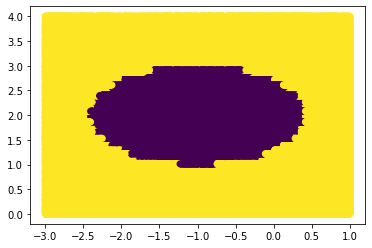

In [43]:
import numpy as np
import matplotlib.pyplot as plt
def montecarlo2(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax)*(by - ay)
    return np.mean(B)*AR

def f_bernoulli(x, y) :
    return (x**2+2*y**2<=-2*x+8*y-7)

x=np.random.uniform(-3,1,1000)
y=np.random.uniform(0,4,1000)
x,y=np.meshgrid(x,y)

plt.figure()
plt.scatter(x, y, c=~f_bernoulli(x,y))
plt.grid

In [47]:
import pandas as pd

N = np.logspace(1, 5, 5) # Genera 5 elementos desde 10^1 hasta 10^5 
table = pd.DataFrame(columns=["Aproximación"], index=N)

for i in N :
    table.loc[i, "Aproximación"] = montecarlo2(f_bernoulli,-3,1,0,4, int(i))
table

,Aproximación
10.0,4.8
100.0,5.44
1000.0,4.4
10000.0,4.4992
100000.0,4.42368


In [49]:
#Ejercicio extra
import pandas as pd

N = np.logspace(1, 5, 5) # Genera 5 elementos desde 10^1 hasta 10^5 
table = pd.DataFrame(columns=["Aproximación" , "Error"], index=N)

# Calculamos el área real del Elipse con la herramienta wolfram alpha
ra = 1
rb = np.sqrt(2)
Ae = ra * rb * np.pi

for i in N :
    table.loc[i, "Aproximación"] = montecarlo2(f_bernoulli,-3,1,0,4, int(i))
table["Error"] = (Ae) - table["Aproximación"]
table

,Aproximación,Error
10.0,4.8,-0.357117
100.0,5.28,-0.837117
1000.0,5.168,-0.725117
10000.0,4.3776,0.065283
100000.0,4.44288,0.000003
